In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

In [5]:
import numpy as np
from sklearn import preprocessing,cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd



In [11]:
#Loading the dataset
names=['id','clump_thickness','univorm_cell_size','uniform_cell_shape',
       'marginal_adhesion','single_epithelial_size','bare_nuclei',
       'bland_chromation','normal_nucleoli','mitoses','class']
df=pd.read_csv("data1.csv",names=names)

In [13]:
#preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)

df.drop(['id'],1,inplace=True)

#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'univorm_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromation', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [14]:
#Do dataset visualization
print(df.loc[6])
print(df.describe())

clump_thickness            1
univorm_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromation           3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  univorm_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromation  \
count         699.000000       

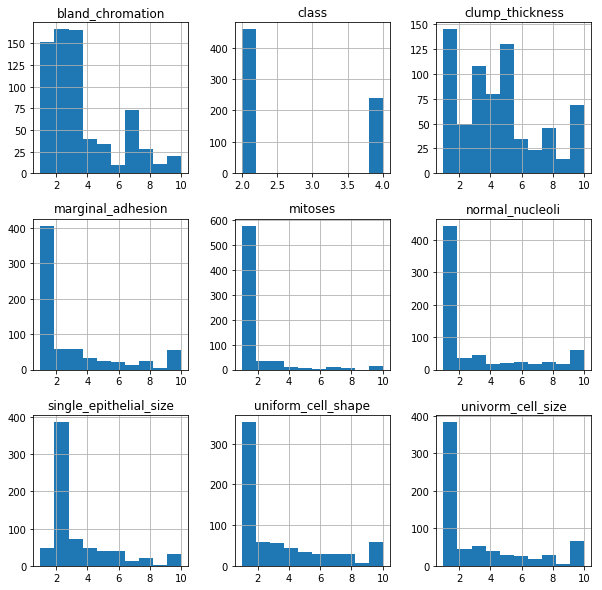

In [15]:
#plot histogram for each variable
df.hist(figsize = (10,10))
plt.show()

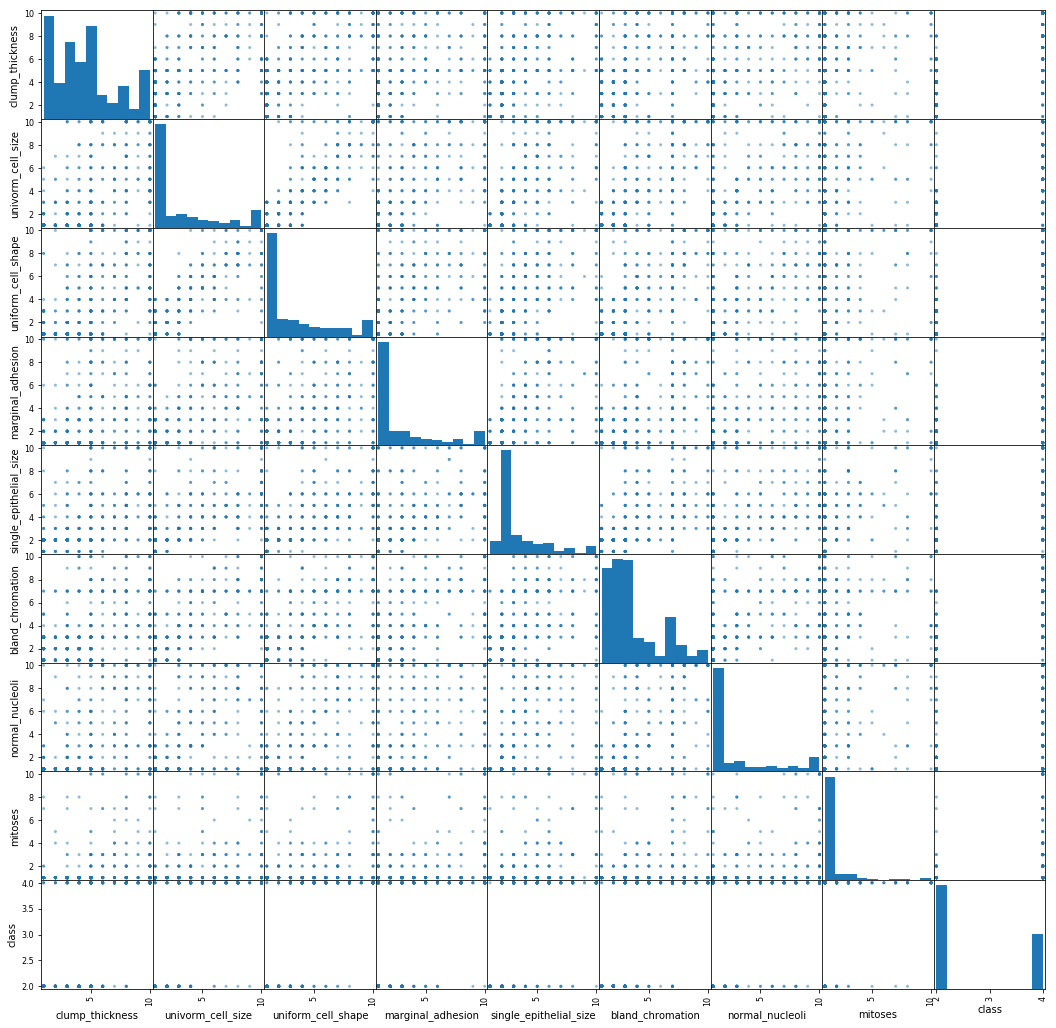

In [16]:
#create scatter plot matrix
scatter_matrix(df,figsize = (18,18))
plt.show()

In [17]:
#create x and Y dataset for training
x = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size = 0.2)

In [18]:
#specify testing options
seed = 8
scoring = 'accuracy'

In [21]:
#define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

#Evaluate each model in turn
results = []
names=[]

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.962370 (0.027188)
SVM: 0.957045 (0.029052)


In [22]:
# Make predictions on validation dataset

for name,model in models:
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9642857142857143
             precision    recall  f1-score   support

          2       0.96      0.99      0.98       100
          4       0.97      0.90      0.94        40

avg / total       0.96      0.96      0.96       140

SVM
0.9571428571428572
             precision    recall  f1-score   support

          2       1.00      0.94      0.97       100
          4       0.87      1.00      0.93        40

avg / total       0.96      0.96      0.96       140



In [23]:
clf = SVC()

clf.fit(x_train,y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9571428571428572
[4]


In [ ]:
1